In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

## Modeling Heatmap

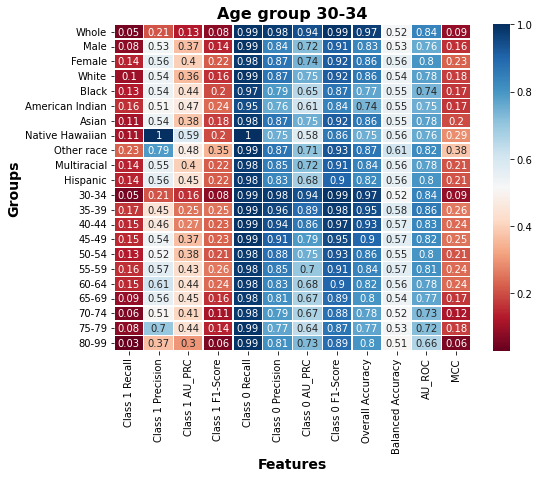

In [52]:
df = pd.read_csv("ML4H 23 (Submission files)/Code/Subgroup_separate_training/BRFSS_2021/Age/30-34/AdaBoost_No_sampling.csv")


matplotlib.rcParams.update({'font.size': 10})

# Set 'Group' as the index
df.set_index('Group ', inplace=True)

# Round the values to 2 decimal points
df = df.round(2)

# Plot the heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(df, cmap='RdBu', annot=True, cbar=True, linewidths=.5)

# Set labels
plt.xlabel('Features', fontsize=14, weight='bold')
plt.ylabel('Groups', fontsize=14, weight='bold')
plt.title('Age group 30-34', fontsize=16, weight='bold')

#plt.savefig('ML4H 23 (Submission files)/Code/Subgroup_separate_training/BRFSS_2021/Age/Figures/heatmap_figure.jpg', dpi=400, bbox_inches='tight')

# Show plot
plt.show()

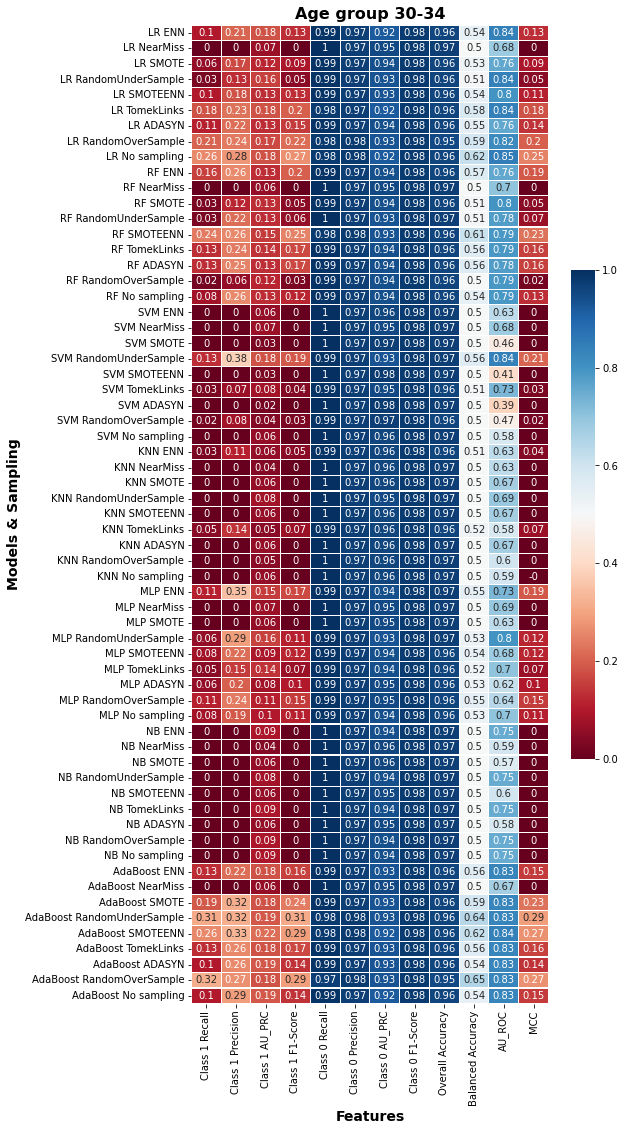

In [61]:
df = pd.read_csv("ML4H 23 (Submission files)/Code/Subgroup_separate_training/BRFSS_2021/Age/Combined/30-34.csv")

df

matplotlib.rcParams.update({'font.size': 10})

# Set 'Group' as the index
df.set_index('Unnamed: 0', inplace=True)

# Round the values to 2 decimal points
df = df.round(2)

# Plot the heatmap
plt.figure(figsize=(8, 18))
sns.heatmap(df, cmap='RdBu', annot=True, cbar=True, linewidths=0.1, cbar_kws={"shrink": 0.5})

# Set labels
plt.xlabel('Features', fontsize=14, weight='bold')
plt.ylabel('Models & Sampling', fontsize=14, weight='bold')
plt.title('Age group 30-34', fontsize=16, weight='bold')

#plt.savefig('ML4H 23 (Submission files)/Code/Subgroup_separate_training/BRFSS_2021/Age/Figures/heatmap_figure.jpg', dpi=400, bbox_inches='tight')

# Show plot
plt.show()


## Combine performance for each subgroup

## 2021

##### Combine the single model performance into one file 

In [68]:
import os

age_group = {3: '30-34', 4: '35-39', 5: '40-44', 6: '45-49',
                7: '50-54', 8: '55-59', 9: '60-64', 10: '65-69',
                11: '70-74', 12: '75-79', 13: '80-99'}

base_directory = "ML4H 23 (Submission files)/Code/Subgroup_separate_training/BRFSS_2021/Age/"

for k in age_group.keys():
    directory = base_directory + age_group[k]

    D = pd.DataFrame()

    for filename in os.listdir(directory):
            if filename.endswith('.csv'):
                file_path = os.path.join(directory, filename)
                model_name = filename.split("_")[0]
                sampling_name = filename.split("_")[1][:-4]

                if model_name == "SVM": continue
                
                df = pd.read_csv(file_path)
                df.set_index('Group ', inplace=True)
                df = df.round(4)

                D[" ".join( filename[:-4].split("_") )] = df.loc[age_group[k]]

    save_path = base_directory + "Combined/" + age_group[k] + ".csv"  
    D.T.to_csv(save_path)

##### Visualize the combined performance

In [ ]:
base_dir = "ML4H 23 (Submission files)/Code/Subgroup_separate_training/BRFSS_2021/Age/"
directory = base_dir + "Combined/"
save_dir = base_dir + "Figures/Full_metrics/"

for filename in os.listdir(directory):
    if filename.endswith('.csv'):
        file_path = os.path.join(directory, filename)
        
        df = pd.read_csv(file_path)
        df.set_index('Unnamed: 0', inplace=True)
        df = df.round(2)

        plt.figure(figsize=(8, 18))
        sns.heatmap(df, cmap='RdBu', annot=True, cbar=True, linewidths=0.1, cbar_kws={"shrink": 0.5})

        plt.xlabel('Features', fontsize=14, weight='bold')
        plt.ylabel('Groups', fontsize=14, weight='bold')
        plt.title('Age group ' + filename[:-4], fontsize=16, weight='bold')

        plt.savefig(save_dir + filename[:-4] +".png", dpi=400, bbox_inches='tight')
        plt.savefig(save_dir + filename[:-4] +".jpg", dpi=400, bbox_inches='tight')

##### Get the stats (mean, std) for each performance combined file

In [ ]:
base_dir = "ML4H 23 (Submission files)/Code/Subgroup_separate_training/BRFSS_2021/Age/Combined/" 

for filename in os.listdir(base_dir):
    if filename.endswith('.csv'):
        
        file_path = os.path.join(base_dir, filename)
        
        df = pd.read_csv(file_path)
        df['ML'] = df['Unnamed: 0'].str.split().str[0]
        del df['Unnamed: 0']

        df_max = df.groupby("ML").max()
        df_min = df.groupby("ML").min()
        df_mean = df.groupby("ML").mean()
        df_std = df.groupby("ML").std()
        
        df_max.to_csv(base_dir + "Stats/" + filename[:-4] + " max.csv")
        df_min.to_csv(base_dir + "Stats/" + filename[:-4] + " min.csv")
        df_mean.to_csv(base_dir + "Stats/" + filename[:-4] + " mean.csv")
        df_std.to_csv(base_dir + "Stats/" + filename[:-4] + " std.csv")

### Span 15

In [110]:
import os

age_group_2 = {3: '30-34', 4: '35-39', 5: '40-44', 6: '45-49',
                7: '50-54', 8: '55-59', 9: '60-64', 10: '65-69',
                11: '70-74', 12: '75-79', 13: '80-99'}

age_group = {
    '30-44': [3, 4, 5],
    '45-59': [6, 7, 8],
    '60-74': [9, 10, 11],
    '75-99': [12, 13]
}


base_directory = "ML4H 23 (Submission files)/Code/Subgroup_separate_training/BRFSS_2021/Age_span_15/"

for k in age_group.keys():
    
    directory = base_directory + k

    for age in age_group[k]:

        D = pd.DataFrame()

        for filename in os.listdir(directory):
                if filename.endswith('.csv'):
                    file_path = os.path.join(directory, filename)
                    model_name = filename.split("_")[0]
                    sampling_name = filename.split("_")[1][:-4]

                    if model_name == "SVM": continue
                    
                    df = pd.read_csv(file_path)
                    df.set_index('Group ', inplace=True)
                    df = df.round(4)

                    D[" ".join( filename[:-4].split("_") )] = df.loc[age_group_2[age]]

        save_path = base_directory + "Combined/" + age_group_2[age] + ".csv"  
        D.T.to_csv(save_path)

In [ ]:
base_dir = "ML4H 23 (Submission files)/Code/Subgroup_separate_training/BRFSS_2021/Age_span_15/"
directory = base_dir + "Combined/"
save_dir = base_dir + "Figures/Full_metrics/"

for filename in os.listdir(directory):
    if filename.endswith('.csv'):
        file_path = os.path.join(directory, filename)
        
        df = pd.read_csv(file_path)
        df.set_index('Unnamed: 0', inplace=True)
        df = df.round(2)

        plt.figure(figsize=(8, 18))
        sns.heatmap(df, cmap='RdBu', annot=True, cbar=True, linewidths=0.1, cbar_kws={"shrink": 0.5})

        plt.xlabel('Features', fontsize=14, weight='bold')
        plt.ylabel('Groups', fontsize=14, weight='bold')
        plt.title('Age group ' + filename[:-4], fontsize=16, weight='bold')

        plt.savefig(save_dir + filename[:-4] +".png", dpi=400, bbox_inches='tight')
        plt.savefig(save_dir + filename[:-4] +".jpg", dpi=400, bbox_inches='tight')

In [115]:
base_dir = "ML4H 23 (Submission files)/Code/Subgroup_separate_training/BRFSS_2021/Age_span_15/Combined/" 

for filename in os.listdir(base_dir):
    if filename.endswith('.csv'):
        file_path = os.path.join(base_dir, filename)
        
        df = pd.read_csv(file_path)
        df['ML'] = df['Unnamed: 0'].str.split().str[0]
        del df['Unnamed: 0']

        df_max = df.groupby("ML").max()
        df_min = df.groupby("ML").min()
        df_mean = df.groupby("ML").mean()
        df_std = df.groupby("ML").std()
        
        df_max.to_csv(base_dir + "Stats/" + filename[:-4] + " max.csv")
        df_min.to_csv(base_dir + "Stats/" + filename[:-4] + " min.csv")
        df_mean.to_csv(base_dir + "Stats/" + filename[:-4] + " mean.csv")
        df_std.to_csv(base_dir + "Stats/" + filename[:-4] + " std.csv")

## 2015

In [71]:
import os

age_group = {3: '30-34', 4: '35-39', 5: '40-44', 6: '45-49',
                7: '50-54', 8: '55-59', 9: '60-64', 10: '65-69',
                11: '70-74', 12: '75-79', 13: '80-99'}

base_directory = "ML4H 23 (Submission files)/Code/Subgroup_separate_training/BRFSS_2015/Age/"

for k in age_group.keys():
    directory = base_directory + age_group[k]

    D = pd.DataFrame()

    for filename in os.listdir(directory):
            if filename.endswith('.csv'):
                file_path = os.path.join(directory, filename)
                model_name = filename.split("_")[0]
                sampling_name = filename.split("_")[1][:-4]

                if model_name == "SVM": continue
                
                df = pd.read_csv(file_path)
                df.set_index('Group ', inplace=True)
                df = df.round(4)

                D[" ".join( filename[:-4].split("_") )] = df.loc[age_group[k]]

    save_path = base_directory + "Combined/" + age_group[k] + ".csv"  
    D.T.to_csv(save_path)

In [ ]:
base_dir = "ML4H 23 (Submission files)/Code/Subgroup_separate_training/BRFSS_2015/Age/"
directory = base_dir + "Combined/"
save_dir = base_dir + "Figures/Full_metrics/"

for filename in os.listdir(directory):
    if filename.endswith('.csv'):
        file_path = os.path.join(directory, filename)
        
        df = pd.read_csv(file_path)
        df.set_index('Unnamed: 0', inplace=True)
        df = df.round(2)

        plt.figure(figsize=(8, 18))
        sns.heatmap(df, cmap='RdBu', annot=True, cbar=True, linewidths=0.1, cbar_kws={"shrink": 0.5})

        plt.xlabel('Features', fontsize=14, weight='bold')
        plt.ylabel('Groups', fontsize=14, weight='bold')
        plt.title('Age group ' + filename[:-4], fontsize=16, weight='bold')

        plt.savefig(save_dir + filename[:-4] +".png", dpi=400, bbox_inches='tight')
        plt.savefig(save_dir + filename[:-4] +".jpg", dpi=400, bbox_inches='tight')

In [101]:
base_dir = "ML4H 23 (Submission files)/Code/Subgroup_separate_training/BRFSS_2015/Age/Combined/" 

for filename in os.listdir(base_dir):
    if filename.endswith('.csv'):
        file_path = os.path.join(base_dir, filename)
        
        df = pd.read_csv(file_path)
        df['ML'] = df['Unnamed: 0'].str.split().str[0]
        del df['Unnamed: 0']

        df_max = df.groupby("ML").max()
        df_min = df.groupby("ML").min()
        df_mean = df.groupby("ML").mean()
        df_std = df.groupby("ML").std()
        
        df_max.to_csv(base_dir + "Stats/" + filename[:-4] + " max.csv")
        df_min.to_csv(base_dir + "Stats/" + filename[:-4] + " min.csv")
        df_mean.to_csv(base_dir + "Stats/" + filename[:-4] + " mean.csv")
        df_std.to_csv(base_dir + "Stats/" + filename[:-4] + " std.csv")


### Span 15

In [3]:
import os

age_group_2 = {3: '30-34', 4: '35-39', 5: '40-44', 6: '45-49',
                7: '50-54', 8: '55-59', 9: '60-64', 10: '65-69',
                11: '70-74', 12: '75-79', 13: '80-99'}

age_group = {
    '30-44': [3, 4, 5],
    '45-59': [6, 7, 8],
    '60-74': [9, 10, 11],
    '75-99': [12, 13]
}


base_directory = "ML4H 23 (Submission files)/Code/Subgroup_separate_training/BRFSS_2015/Age_span_15/"

for k in age_group.keys():
    
    directory = base_directory + k

    for age in age_group[k]:

        D = pd.DataFrame()

        for filename in os.listdir(directory):
                if filename.endswith('.csv'):
                    file_path = os.path.join(directory, filename)
                    model_name = filename.split("_")[0]
                    sampling_name = filename.split("_")[1][:-4]

                    if model_name == "SVM": continue
                    
                    df = pd.read_csv(file_path)
                    df.set_index('Group ', inplace=True)
                    df = df.round(4)

                    D[" ".join( filename[:-4].split("_") )] = df.loc[age_group_2[age]]

        save_path = base_directory + "Combined/" + age_group_2[age] + ".csv"  
        D.T.to_csv(save_path)

In [ ]:
base_dir = "ML4H 23 (Submission files)/Code/Subgroup_separate_training/BRFSS_2015/Age_span_15/"
directory = base_dir + "Combined/"
save_dir = base_dir + "Figures/Full_metrics/"

for filename in os.listdir(directory):
    if filename.endswith('.csv'):
        file_path = os.path.join(directory, filename)
        
        df = pd.read_csv(file_path)
        df.set_index('Unnamed: 0', inplace=True)
        df = df.round(2)

        plt.figure(figsize=(8, 18))
        sns.heatmap(df, cmap='RdBu', annot=True, cbar=True, linewidths=0.1, cbar_kws={"shrink": 0.5})

        plt.xlabel('Features', fontsize=14, weight='bold')
        plt.ylabel('Groups', fontsize=14, weight='bold')
        plt.title('Age group ' + filename[:-4], fontsize=16, weight='bold')

        plt.savefig(save_dir + filename[:-4] +".png", dpi=400, bbox_inches='tight')
        plt.savefig(save_dir + filename[:-4] +".jpg", dpi=400, bbox_inches='tight')

In [5]:
base_dir = "ML4H 23 (Submission files)/Code/Subgroup_separate_training/BRFSS_2015/Age_span_15/Combined/" 

for filename in os.listdir(base_dir):
    if filename.endswith('.csv'):
        file_path = os.path.join(base_dir, filename)
        
        df = pd.read_csv(file_path)
        df['ML'] = df['Unnamed: 0'].str.split().str[0]
        del df['Unnamed: 0']

        df_max = df.groupby("ML").max()
        df_min = df.groupby("ML").min()
        df_mean = df.groupby("ML").mean()
        df_std = df.groupby("ML").std()
        
        df_max.to_csv(base_dir + "Stats/" + filename[:-4] + " max.csv")
        df_min.to_csv(base_dir + "Stats/" + filename[:-4] + " min.csv")
        df_mean.to_csv(base_dir + "Stats/" + filename[:-4] + " mean.csv")
        df_std.to_csv(base_dir + "Stats/" + filename[:-4] + " std.csv")